In [ ]:
options(warn = -1) 
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

library(dplyr)
library(stringr)

In [ ]:

## 2022년 데이터 + 2023 데이터  fetch  ( 3월 달 데이터 만 ( 9월 데이터는 제외한다. ))

현황202203 <- read.csv("Data/GAP/농림축산식품부+국립농산물품질관리원_농산물우수관리(GAP)+인증농가+현황_20220324.csv", fileEncoding="EUC-KR")
현황202303 <- read.csv("Data/GAP/농림축산식품부+국립농산물품질관리원+농산물우수관리(GAP)+인증농가+현황_20230321.csv", fileEncoding="EUC-KR")

소재지배추재배면적22년3월 <- subset(현황202203, 품목 == '배추')
소재지배추재배면적23년3월 <- subset(현황202303, 품목 == '배추')

## 소재지의 시도 정보 분할 하여 칼럼추가 
소재지배추재배면적22년3월$시도 <- str_split_i(소재지배추재배면적22년3월$소재지," ",1);
소재지배추재배면적23년3월$시도 <- str_split_i(소재지배추재배면적23년3월$소재지," ",1);

In [ ]:
## 생산 계획량 정보는 무쓸모 -> 제거
소재지배추재배면적22년3월 <- arrange(distinct(소재지배추재배면적22년3월[,-5]),인증번호)
소재지배추재배면적23년3월 <- arrange(distinct(소재지배추재배면적23년3월[,-5]),인증번호)

In [ ]:
## KOSIS 전국 시도별 노지 배추 연간 생상량 통계 자료 
시도별생산량22년 <- read.csv("Data/GAP/2022 배추생산량.csv", skip=1)
시도별생산량23년 <- read.csv("Data/GAP/2023 배추생산량.csv", skip=1)

In [ ]:
## 연도 칼럼 추가 
시도별생산량23년$연도 <- 2023
시도별생산량22년$연도 <- 2022

In [ ]:
## GAP 농가인증 소재지별 데이터 와 KOSIS 총생산량 데이터 매칭  
for( i in 1:nrow(소재지배추재배면적23년3월)){
    for( j in 1:nrow(시도별생산량23년)){
        if(소재지배추재배면적23년3월$시도[i] == 시도별생산량23년$시도[j]){
            
            소재지배추재배면적23년3월$시도전체면적[i]  <- 시도별생산량23년[j,2]
            소재지배추재배면적23년3월$시도전체생산량[i]  <- 시도별생산량23년[j,4]
            
        }
    }
}

In [ ]:
## 위도 와 경도 칼럼 추가
소재지배추재배면적23년3월$위도 <- c(0)
소재지배추재배면적23년3월$경도 <- c(0)

inputlocalLatLng <- function(주소, 위도값, 경도값) {

    소재지배추재배면적23년3월$위도 <- ifelse(소재지배추재배면적23년3월$소재지 == 주소, 위도값, 소재지배추재배면적23년3월$위도)
    소재지배추재배면적23년3월$경도 <- ifelse(소재지배추재배면적23년3월$소재지 == 주소, 경도값, 소재지배추재배면적23년3월$경도)

    return(소재지배추재배면적23년3월)
}

In [ ]:
소재지배추재배면적23년3월 <- inputlocalLatLng('충청남도 부여군', 36.2757637166445, 126.909772812745)
소재지배추재배면적23년3월 <- inputlocalLatLng('경기도 고양시 일산서구',37.6751982696279,126.750669084916)
소재지배추재배면적23년3월 <- inputlocalLatLng('강원특별자치도 영월군',37.1836860419285,128.461783934728)
소재지배추재배면적23년3월 <- inputlocalLatLng('경상북도 포항시 북구',36.0437417308541,129.368575852182)
소재지배추재배면적23년3월 <- inputlocalLatLng('경기도 광명시',37.4785674780314,126.864647815161)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라남도 곡성군',35.2820258392354,127.291929639637)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라남도 강진군',34.6420615268858,126.767213471898)
소재지배추재배면적23년3월 <- inputlocalLatLng('강원특별자치도 평창군',37.3707820404543,128.39016179013)
소재지배추재배면적23년3월 <- inputlocalLatLng('전북특별자치도 김제시',35.8035816671869,126.88064623757)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라남도 구례군',35.202496361707,127.46270363657)
소재지배추재배면적23년3월 <- inputlocalLatLng('경기도 안산시 상록구',37.3009718344206,126.846482563885)
소재지배추재배면적23년3월 <- inputlocalLatLng('경기도 부천시',37.5035117792843,126.766038450927)
소재지배추재배면적23년3월 <- inputlocalLatLng('대전광역시 유성구',36.3622851114392,127.356257593324)
소재지배추재배면적23년3월 <- inputlocalLatLng('충청북도 충주시',36.9910490160221,127.925961035784)
소재지배추재배면적23년3월 <- inputlocalLatLng('충청북도 진천군',36.855378991826,127.435536085976)
소재지배추재배면적23년3월 <- inputlocalLatLng('경상북도 경주시',35.8562184605051,129.22478171309)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라남도 진도군',34.486828620348,126.263446186439)
소재지배추재배면적23년3월 <- inputlocalLatLng('경기도 용인시 처인구', 37.2343060386837,127.201357139725)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라남도 해남군', 34.5735165884839,126.599270065365)
소재지배추재배면적23년3월 <- inputlocalLatLng('경상북도 영양군', 36.6667028574142,129.112510246081)
소재지배추재배면적23년3월 <- inputlocalLatLng('충청북도 제천시', 37.1326577745507,128.19098500203)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라남도 나주시', 35.0158976865702,126.71082925505)
소재지배추재배면적23년3월 <- inputlocalLatLng('전북특별자치도 익산시', 35.9482628600199,126.957744486694)
소재지배추재배면적23년3월 <- inputlocalLatLng('경상북도 영덕군',36.4150618798074,129.365306771359)
소재지배추재배면적23년3월 <- inputlocalLatLng('충청북도 괴산군', 36.8153571576607, 127.786652163107)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라북도 정읍시', 35.5698491739949, 126.855996873997)
소재지배추재배면적23년3월 <- inputlocalLatLng('전라북도 부안군', 35.7316577924649, 126.733011321782)
소재지배추재배면적23년3월 <- inputlocalLatLng('경상남도 김해시', 35.2285653558628, 128.88936269803)
소재지배추재배면적23년3월 <- inputlocalLatLng('경상남도 통영시', 34.8544448244005, 128.43314921138)

In [ ]:
소재지배추재배면적22년3월$연도 <- 2022
소재지배추재배면적23년3월$연도 <- 2023

In [ ]:
# 2022, 2023 년도 데이터 병합 
소재지별배추재배면적 <- rbind(소재지배추재배면적22년3월,소재지배추재배면적23년3월)

In [ ]:
# 데이터 저장 
write.csv(소재지별배추재배면적, "Data/GAP/2022 ~ 2023 배추생산량.csv")

In [ ]:
배추생산량 <- read.csv("Data/GAP/2022 ~ 2023 배추생산량.csv")
배추생산량 <- 배추생산량[-1]

In [ ]:
# X row index 삭제 
기후정보21년 <- read.csv("21년기후.csv")[-1]
기후정보22년 <- read.csv("22년기후.csv")[-1]

In [ ]:
# 칼럼 정보 직관적으로 바꿈
colnames(기후정보22년) <- c('지점명','연간','지점','평균습도','토양수분','평균기온','평균지면온도')

In [ ]:
## 5개 지역의 기후정보 안들어감 
# '충청북도 괴산군''전라북도 정읍시''전라북도 부안군''경상남도 김해시''경상남도 통영시'
기후정보22년 <- rbind(기후정보22년, data.frame(지점명='전라북도 부안군',기후정보22년[기후정보22년$지점명 == '전북특별자치도 익산시',-1]))
기후정보22년 <- rbind(기후정보22년, data.frame(지점명='전라북도 정읍시',기후정보22년[기후정보22년$지점명 == '전북특별자치도 익산시',-1]))
기후정보22년 <- rbind(기후정보22년, data.frame(지점명='충청북도 괴산군',기후정보22년[기후정보22년$지점명 == '충청북도 충주시',-1]))

기후정보22년 <- rbind(기후정보22년, data.frame(지점명='경상남도 통영시', 연간=2022, 지점=974, 평균습도=74.03719, 토양수분=12.08368, 평균기온=18.92739, 평균지면온도=21.44876))
기후정보22년 <- rbind(기후정보22년, data.frame(지점명='경상남도 김해시', 연간=2022, 지점=974, 평균습도=74.03719, 토양수분=12.08368, 평균기온=18.92739, 평균지면온도=21.44876))

In [ ]:
배추생산량$지점코드 <- 0
배추생산량$평균습도 <- 0
배추생산량$토양수분 <- 0
배추생산량$평균기온 <- 0
배추생산량$평균지면온도 <- 0

## 소재지에 맞는 기후 데이터 매칭 
## 22년도 만 넣음
for(i in 1:nrow(배추생산량)) {
    if(배추생산량$연도[i] == 2022) {
        for(j in 1:nrow(기후정보22년)) {
            if(배추생산량$소재지[i] == 기후정보22년$지점명[j]) {

                배추생산량$지점코드[i] <- 기후정보22년$지점[j]
                배추생산량$평균습도[i] <- 기후정보22년$평균습도[j]
                배추생산량$토양수분[i] <- 기후정보22년$토양수분[j]
                배추생산량$평균기온[i] <- 기후정보22년$평균기온[j]
                배추생산량$평균지면온도[i] <- 기후정보22년$평균지면온도[j]

            }
        }
    }
}

In [ ]:
기후정보23년 <- read.csv("Data/23년기후.csv")[-1]

colnames(기후정보23년) <- c('지점명','연간','지점','평균습도','토양수분','평균기온','평균지면온도')

In [ ]:
## 2023 년 데이터는 기후관측소 주소가 아니라 소재지 주소로 되어있음. 
## 그래서 기후관측소 주소로 매칭함 
for(i in 1:nrow(기후정보23년)) {
    for(j in 1:nrow(기후정보22년)) {
        if(기후정보23년$지점[i] == 기후정보22년$지점[j]) {
            # 기후정보23년 <- rbind(기후정보23년, 기후정보22년[j,])
            # 기후정보23년 <- rbind(기후정보23년, data.frame(기후정보22년$지점명, 기후정보23년[-1]))
            #test<-rbind(test,  data.frame(기후정보22년$지점명[i], 기후정보23년[j,-1]))
            print(data.frame(기후정보22년$지점명[i], 기후정보23년[j,-1]))
        }
    }
}

In [ ]:

지점명22<-arrange(기후정보22년, 지점)$지점명
지점코드22<-arrange(기후정보22년, 지점)$지점

지점코드23 <- 기후정보23년$지점

test <-data.frame()

#연간	지점	평균습도	토양수분	평균기온	평균지면온도
for( i in 1: nrow(기후정보23년)){
    for( j in 1:length(지점코드22)){
        # print(j)
        if(지점코드22[j] ==지점코드23[i]){

            #print(paste(지점코드22[i],지점코드23[j]))
            test<-rbind(test,data.frame(
                지점명 = 지점명22[j], 
                지점 =지점코드22[j],
                연간 =기후정보23년$연간[i],
                평균습도=기후정보23년$평균습도[i],
                토양수분=기후정보23년$토양수분[i],
                평균기온=기후정보23년$평균기온[i],
                평균지면온도=기후정보23년$평균지면온도[i]
            ))
        }

    }
}

test

In [ ]:
## 소재지에 맞는 기후 데이터 매칭 
## 22년도는 있으니까 23년 데이터만 넣는다.
for(i in 1:nrow(배추생산량)) {
    if(배추생산량$연도[i] == 2023) {
        for(j in 1:nrow(test)) {
            if(배추생산량$소재지[i] == test$지점명[j]) {

                배추생산량$지점코드[i] <- test$지점[j]
                배추생산량$평균습도[i] <- test$평균습도[j]
                배추생산량$토양수분[i] <- test$토양수분[j]
                배추생산량$평균기온[i] <- test$평균기온[j]
                배추생산량$평균지면온도[i] <- test$평균지면온도[j]

            }
        }
    }
}

In [ ]:
# 데이터 보존을 위함
test_df <- 배추생산량

# seq 행 삭제
test_df <- test_df[-1]

# 시도전체면적(헥타르)을 m^2으로 변환 
test_df$시도전체면적 <- test_df$시도전체면적*10000

# 소재지별 생산량 계산
test_df$소재지별생산량 <- (test_df$재배면적.제곱미터. / test_df$시도전체면적) * test_df$시도전채생산량

# 데이터 저장
write.csv(test_df, "Data/2022 ~ 2023 GAP 인증 농가의 소재지별생산량.csv", row.names = F)

In [ ]:
test_df <- read.csv("Data/2022 ~ 2023 GAP 인증 농가의 소재지별생산량.csv")

In [85]:
test_df

소재지,품목,재배면적.제곱미터.,시도,시도전체면적,시도전채생산량,위도,경도,연도,지점코드,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량
<chr>,<chr>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
충청북도 괴산군,배추,2453,충청북도,28620000,207409,36.81536,127.7867,2022,977,76.30213,19.23830,18.94553,22.11489,17.7768790
충청북도 괴산군,배추,3337,충청북도,28620000,207409,36.81536,127.7867,2022,977,76.30213,19.23830,18.94553,22.11489,24.1832227
충청북도 괴산군,배추,4380,충청북도,28620000,207409,36.81536,127.7867,2022,977,76.30213,19.23830,18.94553,22.11489,31.7418386
충청북도 괴산군,배추,6615,충청북도,28620000,207409,36.81536,127.7867,2022,977,76.30213,19.23830,18.94553,22.11489,47.9388726
전라북도 정읍시,배추,1276,전라북도,16830000,161615,35.56985,126.8560,2022,702,78.54545,15.77253,19.02532,20.92888,12.2531634
전라북도 정읍시,배추,6100,전라북도,16830000,161615,35.56985,126.8560,2022,702,78.54545,15.77253,19.02532,20.92888,58.5770351
전라북도 정읍시,배추,1206,전라북도,16830000,161615,35.56985,126.8560,2022,702,78.54545,15.77253,19.02532,20.92888,11.5809679
전라북도 정읍시,배추,1977,전라북도,16830000,161615,35.56985,126.8560,2022,702,78.54545,15.77253,19.02532,20.92888,18.9847210
전라북도 정읍시,배추,1355,전라북도,16830000,161615,35.56985,126.8560,2022,702,78.54545,15.77253,19.02532,20.92888,13.0117840


In [86]:
final_df

재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2453,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,17.7768790
3337,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,24.1832227
4380,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,31.7418386
6615,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,47.9388726
1276,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,12.2531634
6100,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,58.5770351
1206,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,11.5809679
1977,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,18.9847210
1355,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,13.0117840


In [ ]:
summary(lm(시도전채생산량 ~ ., data = test_df[,-c(1,2,3,5,16)]))

In [82]:
final_df <- test_df[,-c(1,2,4,5,6,9,10)]

In [83]:
summary(lm(소재지별생산량 ~ ., data = final_df))


Call:
lm(formula = 소재지별생산량 ~ ., data = final_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.7494  -0.7302  -0.0357   0.6759  22.5667 

Coefficients:
                       Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)        211.07900836  17.85965066  11.819 < 0.0000000000000002 ***
재배면적.제곱미터.   0.00883936   0.00001814 487.236 < 0.0000000000000002 ***
위도                -0.01981733   0.09793065  -0.202             0.839649    
경도                -1.28403464   0.11831017 -10.853 < 0.0000000000000002 ***
평균습도             0.00117334   0.01865280   0.063             0.949847    
토양수분            -0.03245510   0.00715728  -4.535           0.00000601 ***
평균기온            -0.84873038   0.22102421  -3.840             0.000126 ***
평균지면온도        -1.43220293   0.10438580 -13.720 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.375 on 2810 degrees of freedom
Multiple R-squared:  0.9886,	Adju

In [84]:
summary(step(lm(소재지별생산량 ~ ., data = final_df)), direction= "backward")

Start:  AIC=4882.67
소재지별생산량 ~ 재배면적.제곱미터. + 위도 + 
    경도 + 평균습도 + 토양수분 + 평균기온 + 평균지면온도

                     Df Sum of Sq     RSS     AIC
- 평균습도            1         0   15848  4880.7
- 위도                1         0   15848  4880.7
<none>                              15848  4882.7
- 평균기온            1        83   15931  4895.4
- 토양수분            1       116   15964  4901.2
- 경도                1       664   16512  4996.4
- 평균지면온도        1      1062   16909  5063.4
- 재배면적.제곱미터.  1   1338867 1354715 17416.0

Step:  AIC=4880.67
소재지별생산량 ~ 재배면적.제곱미터. + 위도 + 
    경도 + 토양수분 + 평균기온 + 평균지면온도

                     Df Sum of Sq     RSS     AIC
- 위도                1         0   15848  4878.7
<none>                              15848  4880.7
- 평균기온            1        85   15933  4893.8
- 토양수분            1       119   15967  4899.8
- 경도                1       720   16568  5003.9
- 평균지면온도        1      1147   16995  5075.7
- 재배면적.제곱미터.  1   1338910 1354758 17414.1

Step:  AIC=4878.72
소재지별생산량 ~ 재배면적.제곱미터


Call:
lm(formula = 소재지별생산량 ~ 재배면적.제곱미터. + 
    경도 + 토양수분 + 평균기온 + 평균지면온도, 
    data = final_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.7527  -0.7325  -0.0353   0.6771  22.5800 

Coefficients:
                      Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)        211.3449125  16.8159062  12.568 < 0.0000000000000002 ***
재배면적.제곱미터.   0.0088391   0.0000181 488.441 < 0.0000000000000002 ***
경도                -1.2924898   0.1097321 -11.779 < 0.0000000000000002 ***
토양수분            -0.0317751   0.0064557  -4.922          0.000000906 ***
평균기온            -0.8346822   0.2055285  -4.061          0.000050165 ***
평균지면온도        -1.4366925   0.0957986 -14.997 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.374 on 2812 degrees of freedom
Multiple R-squared:  0.9886,	Adjusted R-squared:  0.9886 
F-statistic: 4.884e+04 on 5 and 2812 DF,  p-value: < 0.00000000000000022


In [ ]:
arrange(test_df[,c(4,6,7,12,16)],재배면적.제곱미터.)

In [ ]:
testFuction(31000, 83640000, 701228, 33.21368)

In [ ]:
summary(lm(소재지별생산량 ~ ., data = test_df[,c(4,6,7,12,16)]))

In [ ]:
testFuction <- function (재배면적, 시도전체면적, 시도전채생산량, 토양수분) {
    cat((0.00883725006*재배면적 + -0.00000063880*시도전체면적 + 0.00007386138*시도전채생산량 + 0.03285183687*토양수분) -0.14723290184 - 2.296, '~', 
    (0.00883725006*재배면적 + -0.00000063880*시도전체면적 + 0.00007386138*시도전채생산량 + 0.03285183687*토양수분) -0.14723290184 + 2.296
    )
}  

In [ ]:
lm(소재지별생산량 ~ ., data = test_df[,-c(1,2,3,5)])[1]

In [ ]:
471.230818018212 test_df$재배면적.제곱미터.*0.00883621755798725 + test_df$시도전체면적*-0.000000492339863231056 + test_df$시도전채생산량*0.0000552297641635945 + test_df$위도 * -0.538795337465893 + test_df$경도 * -0.239725005442874 + test_df$연도 * -0.199297692156139 + test_df$평균습도 * -0.0157936328497369 + test_df$토양수분 * 0.0325378899828065 + test_df$평균기온 * -0.351642602371304 + test_df$평균지면온도 * -0.479954947328168 + test_df$지점코드 * -0.000107639170627123

In [ ]:
summary(step(lm(소재지별생산량 ~ ., data = test_df[,-c(1,2,3,5)]), direction="backward"))

## 전체생산량과, 전체면적은 소재지별 면적계산하기위한 factor 이지 앱사용자가 넣을수있는 값이 아니므로 회귀식을 만들때 제외한다. 




In [ ]:
head(test_df[-c(1:3,5,6,7,10,15)],1)
test_df[-c(1,2,4:6,9,10)]
# 재배면적.제곱미터.	위도	경도	평균습도	토양수분	평균기온	평균지면온도	소재지별생산량

In [ ]:
test_df_wCF <- test_df[-c(1,2,4:6,9,10)]# CF = calcualtion factor

(lm(소재지별생산량 ~ ., data = test_df_wCF))

#(step(lm(소재지별생산량 ~ ., data = test_df_wCF),scope = list(lower ~ 1, upper = ~ .), direction = "both"))

regFunction <- function (재배면적, 시도전체면적, 시도전채생산량, 토양수분) {
    cat((0.00883725006*재배면적 + -0.00000063880*시도전체면적 + 0.00007386138*시도전채생산량 + 0.03285183687*토양수분) -0.14723290184 - 2.296, '~', 
    (0.00883725006*재배면적 + -0.00000063880*시도전체면적 + 0.00007386138*시도전채생산량 + 0.03285183687*토양수분) -0.14723290184 + 2.296
    )
}  

regression <-function(재배면적.제곱미터.,	위도	,경도	,평균습도,	토양수분,	평균기온,	평균지면온도){
                                     
        211.079008+            0.008839*재배면적.제곱미터.           -0.019817*위도           -1.284035*경도  +

          0.001173*평균습도           -0.032455*토양수분           -0.848730*평균기온           -1.432203*평균지면온도  
}

regression_1 <- (lm(소재지별생산량 ~ 재배면적.제곱미터.	, data = test_df_wCF))


In [ ]:
# arrange(test_df_wCF,desc(재배면적.제곱미터.	))
regression(41.0	,34.57352	,126.5993	,74.67949,	30.13191,	19.91164	,21.63205		)# 230.467

In [ ]:
arrange(test_df_wCF,desc(재배면적.제곱미터.	))

In [305]:
# RandomForest 생사여부 예측율과 오분류표 구하기
rfFun <- function(method,data,targetCol,count)  {
    library(randomForest)
    library(caret)
    library(e1071)
    result <- c()
    for(i in 1:count) {
        samp <- createDataPartition(data[,targetCol], p=0.7, list=F)

        model <- method(as.formula(paste(names(data)[targetCol], "~ .")), data = data[samp,], ntree = 200, kernel = "radial",  )
        result <- c(result,
            # mean(
            #     predict(model, subset(data[-samp,], select = -targetCol)) == data[-samp,targetCol]
            #     )) # 예측력
            sqrt(mean(
                (predict(model, subset(data[-samp,], select = -targetCol)) - data[-samp,targetCol])^2
        ))) # 예측력
        #     mean(
        #         abs(predict(model, subset(data[-samp,], select = -targetCol)) - data[-samp,targetCol])
        # )) # 예측력
        # rfFun_result_df <- rbind(rfFun_result_df,data.frame(예측값 = predict(model, subset(data[-samp,], select = -targetCol)), 실제값 = data[-samp,targetCol]))
        # print('예측')
        # print(predict(model, subset(data[-samp,], select = -targetCol))[i])
        # print('실제')
        # print(data[-samp,targetCol][i])
    }
    cat("\033[32m------------------------------------------------\033[0m\n")
    cat("\033[36m 오차 \033[0m\n",result,"\n")
    # cat("\n------------------------------------------------\n")
    cat("\033[32m------------------------------------------------\033[0m\n")
    cat("\033[31m 평균 오차 \033[0m\n",mean(result),"\n")
    # cat("\n------------------------------------------------")
    cat("\033[32m------------------------------------------------\033[0m\n")
}

In [307]:
test_df_wCF

재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2453,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,17.7768790
3337,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,24.1832227
4380,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,31.7418386
6615,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,47.9388726
1276,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,12.2531634
6100,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,58.5770351
1206,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,11.5809679
1977,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,18.9847210
1355,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,13.0117840


In [306]:
rfFun(svm, test_df_wCF, 8, 4)

------------------------------------------------
 오차 
 8.573963 13.44875 7.048506 14.02382 
------------------------------------------------
 평균 오차 
 10.77376 
------------------------------------------------


In [290]:
rfFun(randomForest, newTest_df[1:8], 8, 30)

------------------------------------------------
 오차 
 3.932075 4.318114 4.011023 4.124064 3.941095 3.904029 3.981599 3.80439 4.295248 3.762752 3.77781 3.940088 4.150824 3.927064 3.888515 4.23639 4.049076 3.877737 3.821287 3.622214 3.693806 4.303789 3.949717 3.906991 3.594046 4.023013 4.082934 3.648665 3.923979 4.133297 
------------------------------------------------
 평균 오차 
 3.954188 
------------------------------------------------


In [261]:
arr_df_1 <- arrange(newTest_df, kmeans300)

In [ ]:
arrange(arr_df_1[arr_df_1$kmeans300 == j, ], 소재지별생산량)
nrow(arrange(arr_df_1[arr_df_1$kmeans300 == j, ], 소재지별생산량))

In [277]:
j <- 1
boundary_df <- c()
for(i in 1:300) {

    temp_df <- data.frame(
        kmean <-  j,
        최소생산량 <- arrange(arr_df_1[arr_df_1$kmeans300 == j, ], 소재지별생산량)$소재지별생산량[1],
        최대생산량 <- arrange(arr_df_1[arr_df_1$kmeans300 == j, ], 소재지별생산량)$소재지별생산량[nrow(arrange(arr_df_1[arr_df_1$kmeans300 == j, ], 소재지별생산량))]
    )

    boundary_df <- rbind(boundary_df, temp_df)

    j <- j + 1
}


In [297]:
boundary_df

kmean,최소생산량,최대생산량
<dbl>,<dbl>,<dbl>
1,6.2034278,8.162374
2,62.4093942,92.071576
3,18.3765831,23.055679
4,3.7436261,3.917748
5,2.0121320,2.062435
6,23.7609755,34.406806
7,3.0538345,4.321257
8,59.5373143,59.537314
9,17.3797901,17.463629


In [278]:
colnames(boundary_df) <- c('kmean', '최소생산량', '최대생산량')

In [252]:
arr_df <- arrange(newTest_df, 소재지별생산량)

In [254]:
arr_df$arrKmean <- kmeans(arr_df,centers = 300,iter.max = 10000)$cluster

In [247]:
newTest_df$kmeans300 <- as.factor(newTest_df$kmeans300)

In [248]:
rfFun(randomForest, newTest_df, 11, 50)

[1] "예측"
  7 
216 
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "실제"
[1] 216
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "예측"
  7 
216 
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "실제"
[1] 216
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "예측"
 13 
195 
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "실제"
[1] 195
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "예측"
 13 
195 
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "실제"
[1] 195
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "예측"
 25 
209 
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "실제"
[1] 209
300 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 300
[1] "예측"
 21 
238 
3

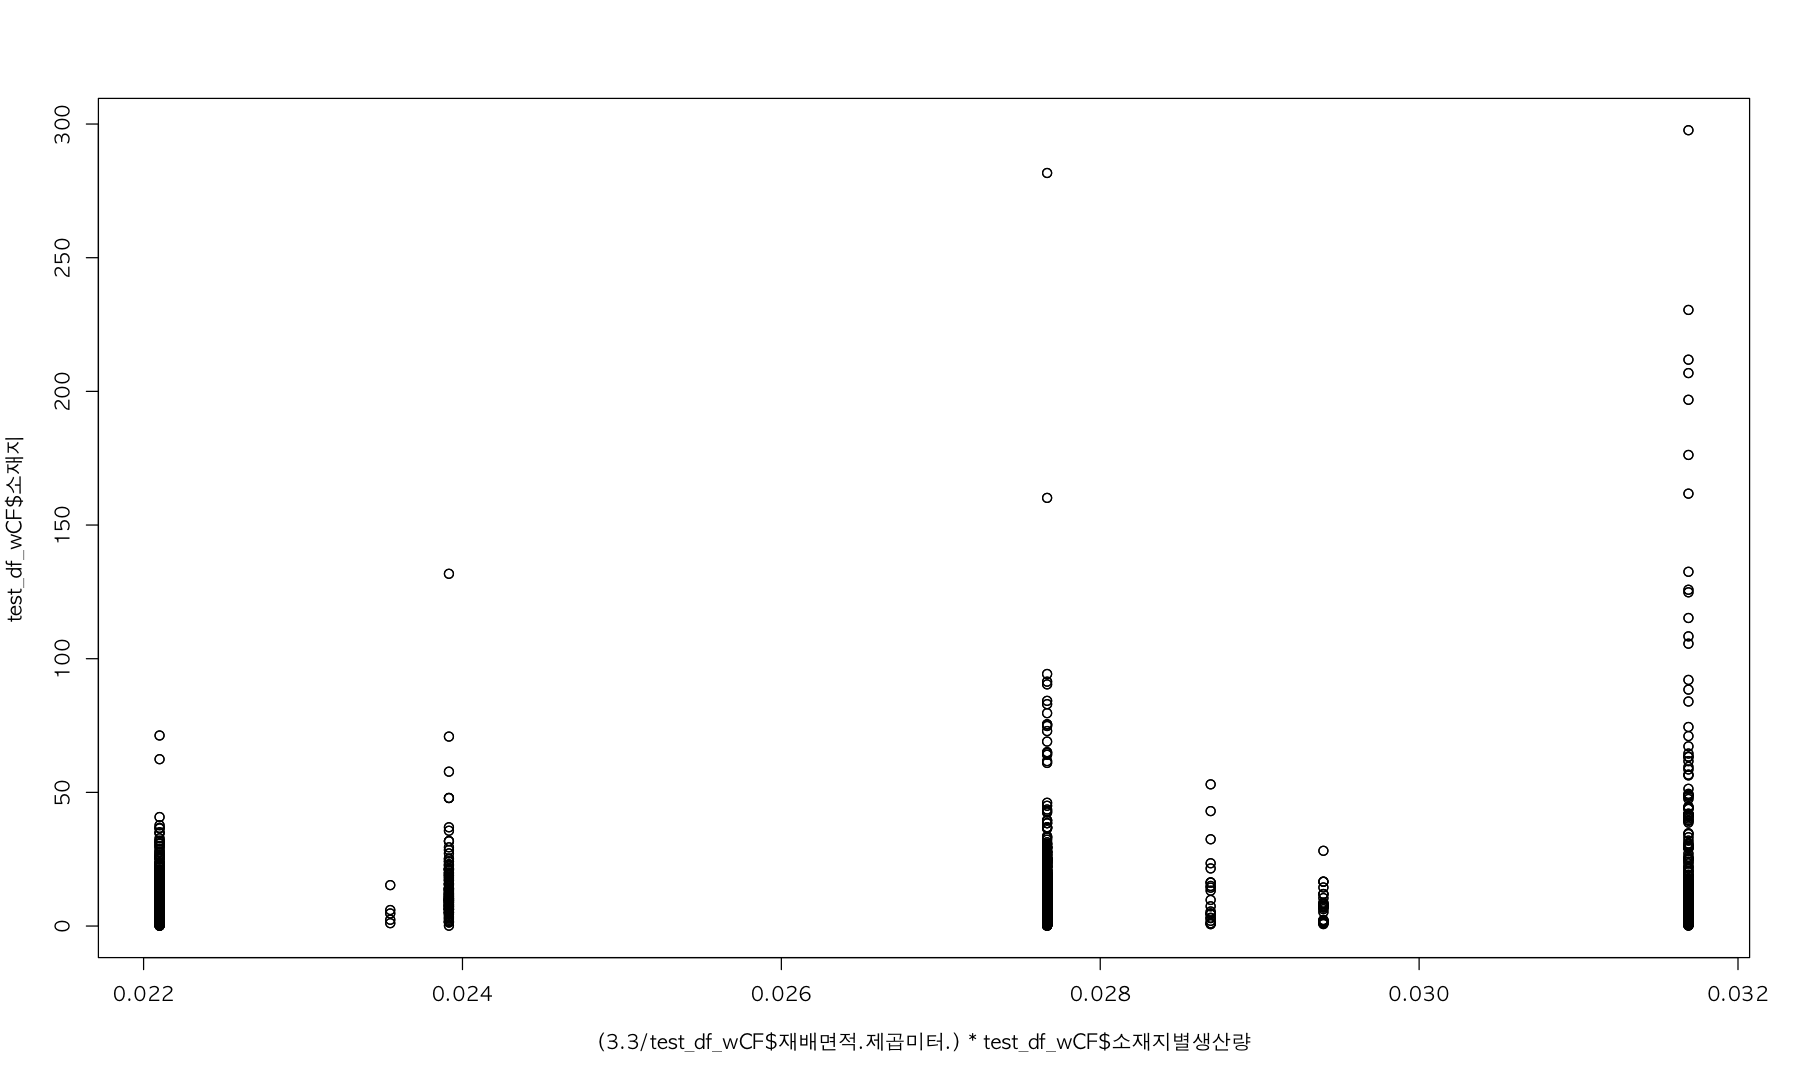

In [106]:
par(bg='white', family="appleGothic")
plot(
    (3.3 / test_df_wCF$재배면적.제곱미터.) * test_df_wCF$소재지별생산량,
    test_df_wCF$소재지,
)

In [111]:
newTest_df <- final_df

In [112]:
newTest_df$log생산량 <- log(newTest_df$소재지별생산량)

In [283]:
newTest_df

재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량,log생산량,kmean,kmeans300
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
2453,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,17.7768790,2.87789868,3,53
3337,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,24.1832227,3.18565911,3,204
4380,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,31.7418386,3.45763564,3,86
6615,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,47.9388726,3.86992671,2,199
1276,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,12.2531634,2.50578414,1,270
6100,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,58.5770351,4.07034273,2,50
1206,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,11.5809679,2.44936305,1,216
1977,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,18.9847210,2.94363450,3,159
1355,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,13.0117840,2.56585541,1,277


------------------------------------------------
 오차 
 1.935394 1.623584 2.11568 1.467783 
------------------------------------------------
 평균 오차 
 1.78561 
------------------------------------------------


In [96]:
rfFun(randomForest, test_df_wCF, 8, 50)

------------------------------------------------
 오차 
 8.459228 9.165836 7.498401 7.548529 8.648815 7.686249 6.505155 8.146519 8.204945 8.467521 12.51064 11.91307 8.008185 10.59666 9.662401 8.74028 6.725301 5.660699 10.85606 6.700702 5.60919 9.994243 5.552776 5.27655 8.802904 6.872902 7.515526 5.72984 7.353778 8.405521 10.88748 8.19563 7.778395 8.949833 10.84945 6.10589 6.020066 5.770818 7.40843 7.904789 7.773143 8.069699 9.944292 6.083437 9.257242 11.47308 10.22437 8.258902 8.319129 9.289658 
------------------------------------------------
 평균 오차 
 8.227643 
------------------------------------------------


In [ ]:
## 여기서 무엇을 볼수있는가???

# 이쁘다.. 근데 뭔가 아닌거 같다. 

#소재이상하다. 

library(randomForest)
rf <- randomForest(소재지별생산량 ~ 재배면적.제곱미터., data = test_df_wCF, ntree = 100)
svm_model <- svm(소재지별생산량 ~ 재배면적.제곱미터., data = test_df_wCF)


test_value<- 33599
predict(rf, data.frame(재배면적.제곱미터. = test_value))
predict(svm_model, data.frame(재배면적.제곱미터. = test_value))
# summary(regression_1)
# predict(rf, list(발생건수 = 100))
0.008876 *test_value -1.248960   
test_df_wCF[test_df_wCF$재배면적.제곱미터.	== test_value,]$소재지별생산량
arrange(test_df_wCF, desc(재배면적.제곱미터.	))

In [118]:
library(NbClust)

[1] "Frey index : No clustering structure in this data set"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


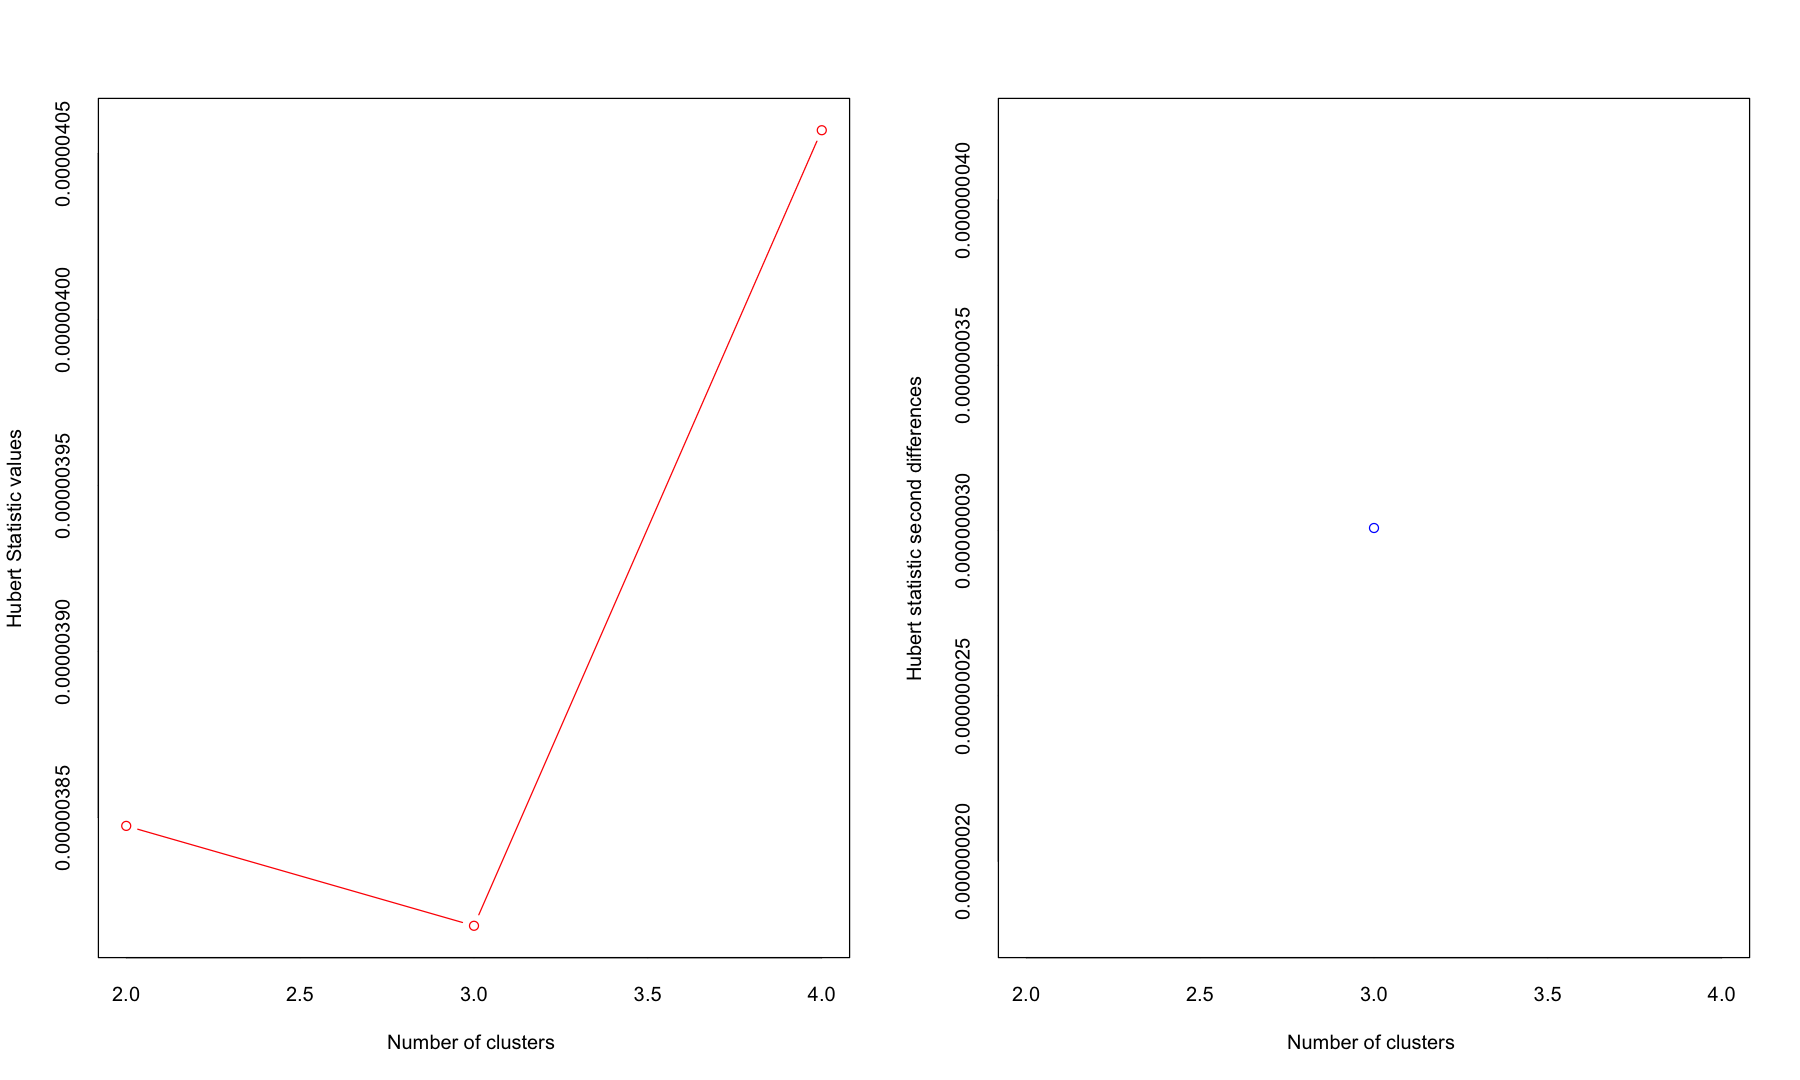

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 2 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


$All.index
       KL        CH Hartigan     CCC    Scott  Marriot TrCovW    TraceW
2 17.6674  689.0008 3256.264 13.5226 4580.292 760428.5     NA 190107.13
3  0.2420 2374.7191 3021.183  8.8593 6701.545 799043.2     NA  88782.58
4  4.5854 4307.2980 1406.712  7.8123 8272.950 808146.3     NA  50509.14
  Friedman   Rubin Cindex     DB Silhouette   Duda  Pseudot2  Beale Ratkowsky
2   4.1760  5.1760 0.1167 0.6738     0.7397 0.4941 2104.6928 0.3411    0.3150
3  10.0833 11.0833 0.0994 0.6455     0.6073 0.7153  951.9623 0.1326    0.4585
4  18.4816 19.4816 0.0870 0.6146     0.5597 0.9851   23.1297 0.0050    0.4536
       Ball Ptbiserial   Frey McClain   Dunn Hubert SDindex Dindex   SDbw
2 191887.25     0.7447 5.7343  0.0401 0.0041      0  0.3394 6.2592 1.2375
3  58961.45     0.5758 2.7029  0.1871 0.0006      0  0.3048 4.3297 0.8321
4  21203.21     0.4846 1.4927  0.3325 0.0016      0  0.3580 3.2686 0.5748

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2         0.3243           4283.236       0.5593
3         0.3188           5110.618       0.7158
4         0.3099           3406.580       0.9434

$Best.nc
                     KL       CH Hartigan     CCC    Scott   Marriot TrCovW
Number_clusters  2.0000    4.000     4.00  2.0000    3.000      3.00   -Inf
Value_Index     17.6674 4307.298  1614.47 13.5226 2121.253 -29511.65      3
                  TraceW Friedman  Rubin Cindex     DB Silhouette   Duda
Number_clusters 63051.11   8.3984 2.4911  0.087 0.6146     0.7397 0.4941
Value_Index         4.00   3.0000 4.0000  4.000 2.0000     2.0000 2.0000
                PseudoT2  Beale Ratkowsky     Ball PtBiserial Frey McClain
Number_clusters 2104.693 0.3411    0.4585 132925.8     0.7447   NA  0.0401
Value_Index        2.000 3.0000    3.0000      2.0         NA    2  2.0000
                  Dunn Hubert SDindex Dindex   SDbw
Number_clusters 0.0041      0  0.3048      0 0.5748
Value_Index     0.0000      3  0.0000      4 2.0000

$Best.partition
   [1] 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1
 [297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [334] 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [371] 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 [445] 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [482] 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [519] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [593] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [630] 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2
 [667] 2 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 1
 [704] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 1
 [741] 2 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 [778] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [815] 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1
 [852] 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

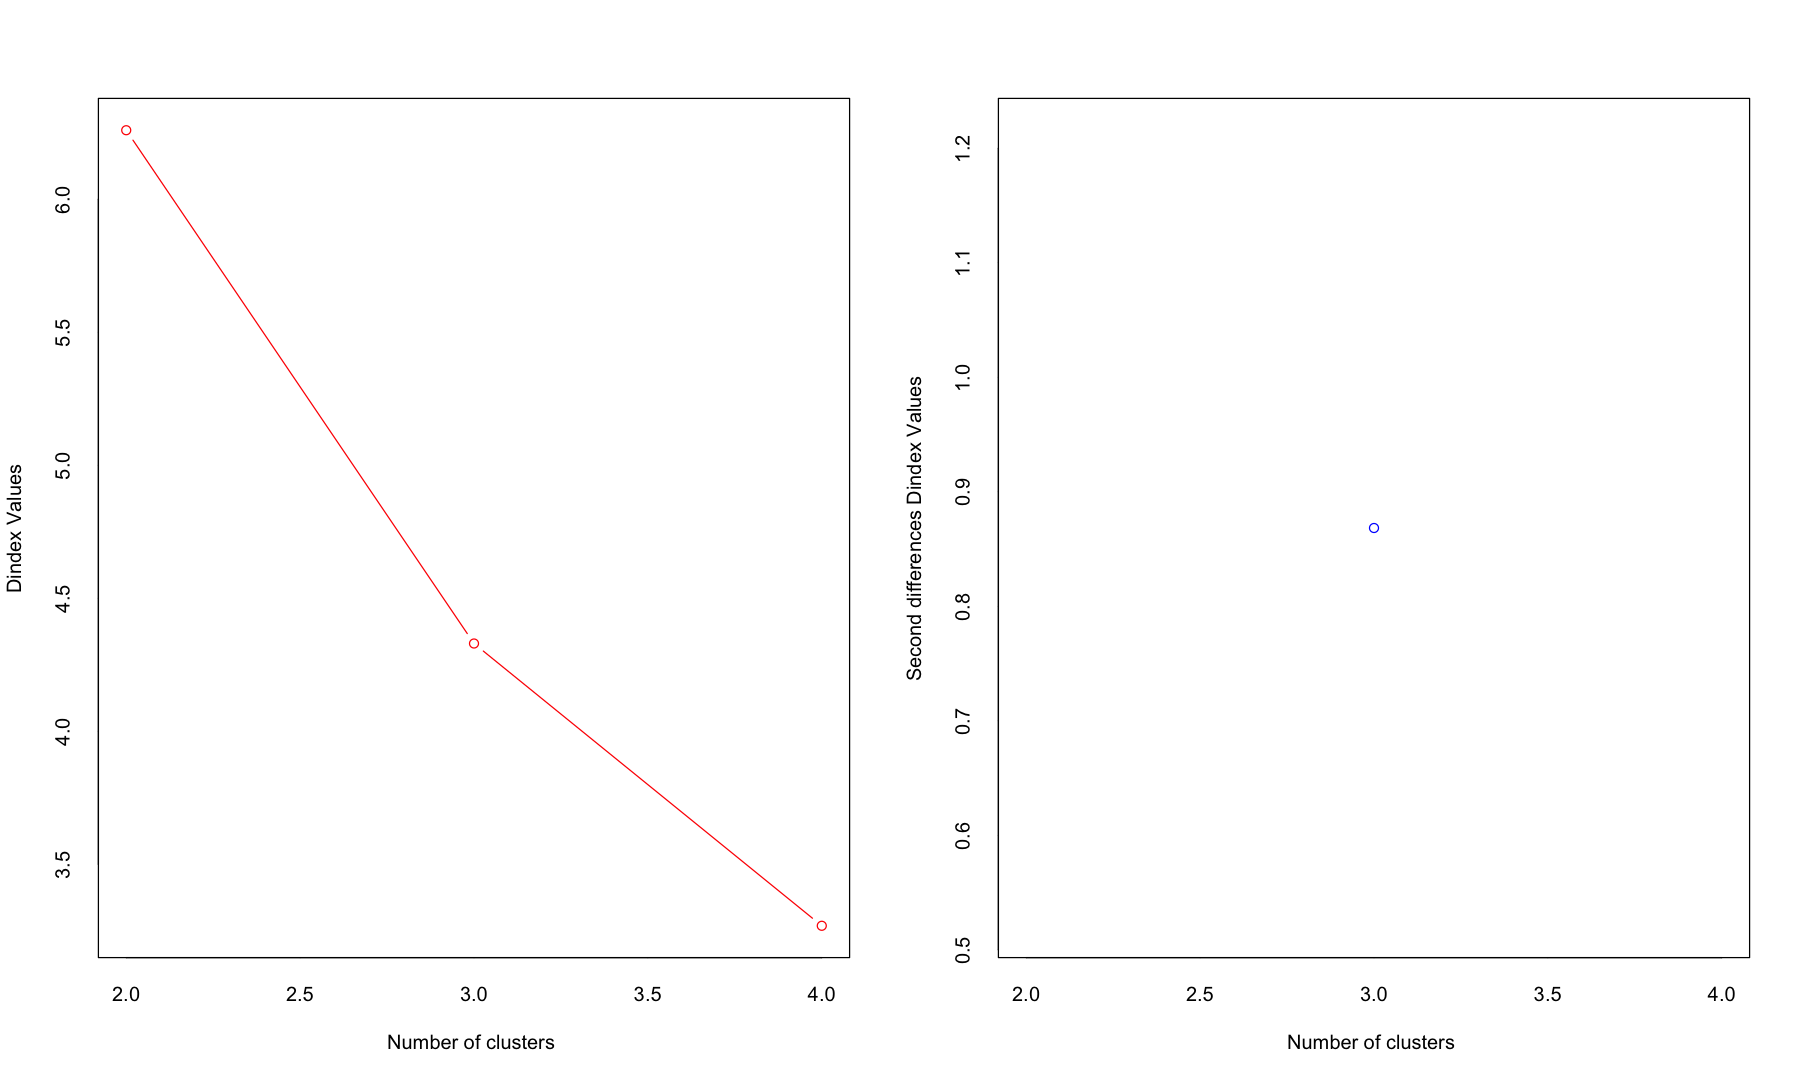

In [296]:

NbClust(newTest_df[newTest_df$소재지별생산량 < 100,]$소재지별생산량, min.nc = 2, max.nc = 4, method='kmeans')

In [299]:
newTest_df

재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량,log생산량,kmean,kmeans300
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
2453,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,17.7768790,2.87789868,3,53
3337,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,24.1832227,3.18565911,3,204
4380,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,31.7418386,3.45763564,3,86
6615,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,47.9388726,3.86992671,2,199
1276,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,12.2531634,2.50578414,1,270
6100,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,58.5770351,4.07034273,2,50
1206,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,11.5809679,2.44936305,1,216
1977,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,18.9847210,2.94363450,3,159
1355,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,13.0117840,2.56585541,1,277


[1] "Frey index : No clustering structure in this data set"
*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


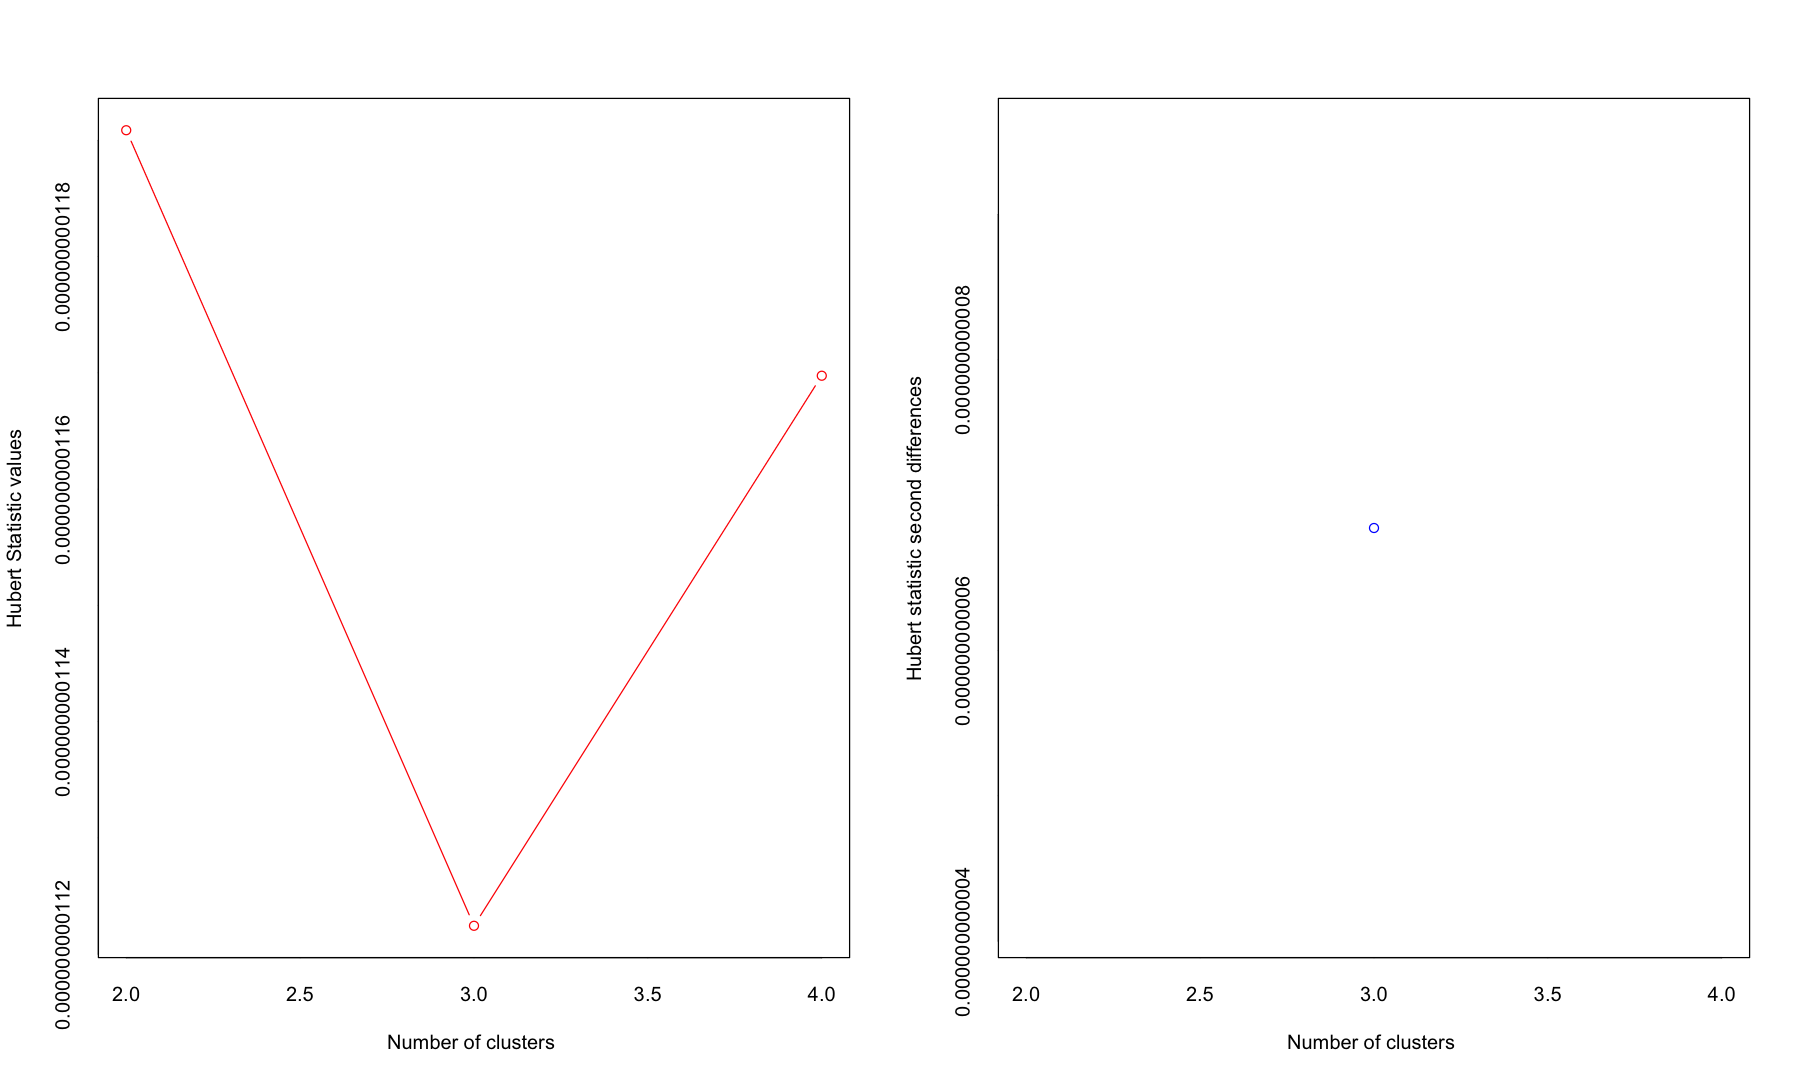

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 8 proposed 2 as the best number of clusters 
* 8 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


$All.index
      KL       CH Hartigan       CCC    Scott
2 2.7510 3885.768 2083.725   -3.4819 36384.88
3 1.2359 4420.831 2818.225  -95.4154 38308.36
4 3.5156 6834.797 1128.414 -213.3725 40343.82
                               Marriot              TrCovW     TraceW Friedman
2 339057009198157037682995020972425216 6624885401191031808 7289409004 137437.1
3 385494453818577974021803701604188160 2188016461538348288 4189414050 137965.5
4 332814199403126108558599828075970560  546289448790652480 2093507802 138082.1
    Rubin Cindex     DB Silhouette   Duda  Pseudot2   Beale Ratkowsky
2  3.7298 0.0488 0.6695     0.8643 0.8328  461.8851  1.0483    0.1611
3  6.4897 0.0349 0.7392     0.6587 0.6555  397.2490  2.7060    0.1615
4 12.9869 0.0395 0.6130     0.6154 1.5388 -169.4702 -1.8293    0.1552
        Ball Ptbiserial    Frey McClain   Dunn Hubert SDindex    Dindex   SDbw
2 3644704502     0.7705 14.8852  0.0069 0.0105      0  0.0045 1031.9211 3.4261
3 1396471350     0.5085  4.9682  0.0941 0.0009      0  0.0041  749.1014 2.9097
4  523376950     0.4477  3.5909  0.1557 0.0005      0  0.0031  585.0965 1.5754

$All.CriticalValues
  CritValue_Duda CritValue_PseudoT2 Fvalue_Beale
2         0.7529           754.7639       0.3981
3         0.6806           354.7866       0.0068
4         0.7587           153.9052       1.0000

$Best.nc
                    KL       CH Hartigan     CCC   Scott
Number_clusters 4.0000    4.000    4.000  2.0000    4.00
Value_Index     3.5156 6834.797 1689.811 -3.4819 2035.46
                                             Marriot              TrCovW
Number_clusters                                    3                   3
Value_Index     -99117699035872801802012554159980544 4436868939652683776
                    TraceW Friedman  Rubin Cindex    DB Silhouette   Duda
Number_clusters          3   3.0000 3.0000 3.0000 4.000     2.0000 2.0000
Value_Index     1004088705 528.4145 3.7372 0.0349 0.613     0.8643 0.8328
                PseudoT2  Beale Ratkowsky       Ball PtBiserial Frey McClain
Number_clusters   2.0000 2.0000    3.0000          3     2.0000   NA  2.0000
Value_Index     461.8851 1.0483    0.1615 2248233152     0.7705   NA  0.0069
                  Dunn Hubert SDindex Dindex   SDbw
Number_clusters 2.0000      0  4.0000      0 4.0000
Value_Index     0.0105      0  0.0031      0 1.5754

$Best.partition
   [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2
 [297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [556] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 [630] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 [667] 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 [704] 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 [741] 2 2 2 2 1 2 2 2 2 2 2 2

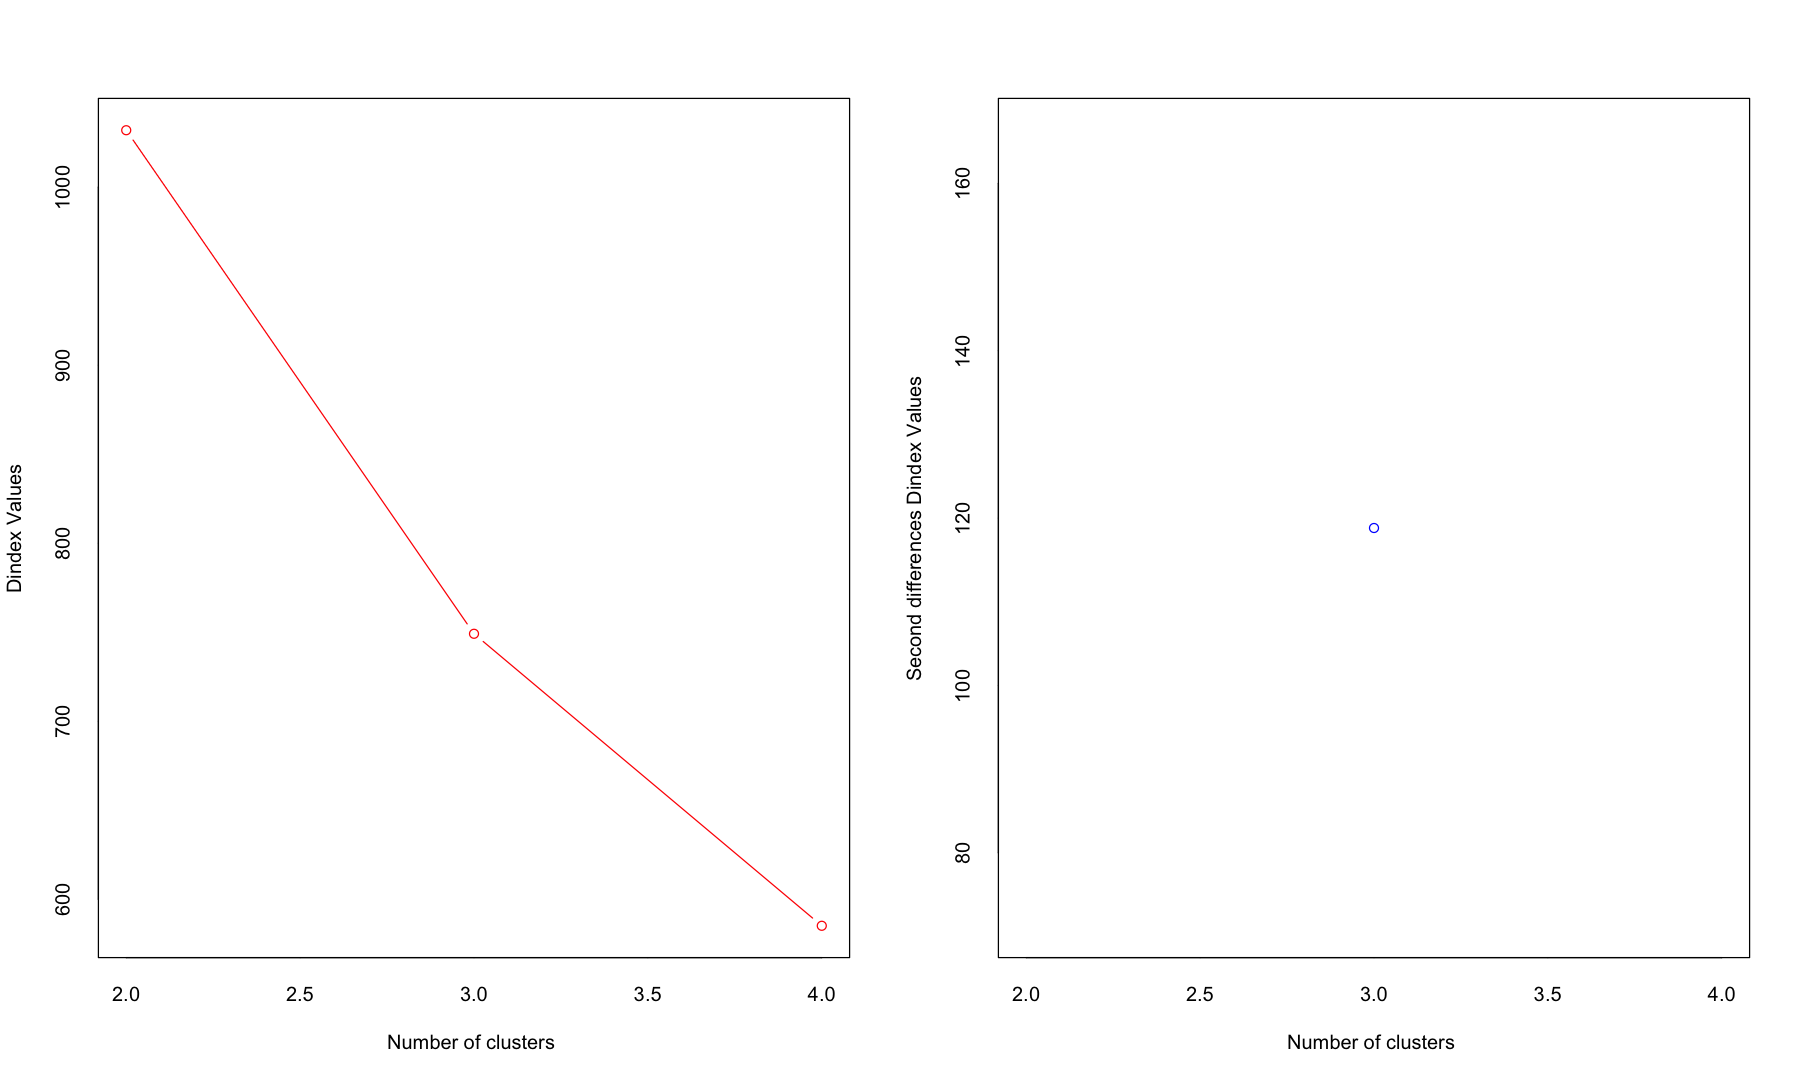

In [301]:
par(bg='white')
NbClust(newTest_df[1:8], min.nc = 2, max.nc = 4, method='kmeans')

In [198]:
library(descr)

,Frequency,Percent
1,11,0.39034776
2,6,0.21291696
3,16,0.56777857
4,5,0.17743080
5,9,0.31937544
6,7,0.24840312
7,2,0.07097232
8,6,0.21291696
9,4,0.14194464
10,14,0.49680625


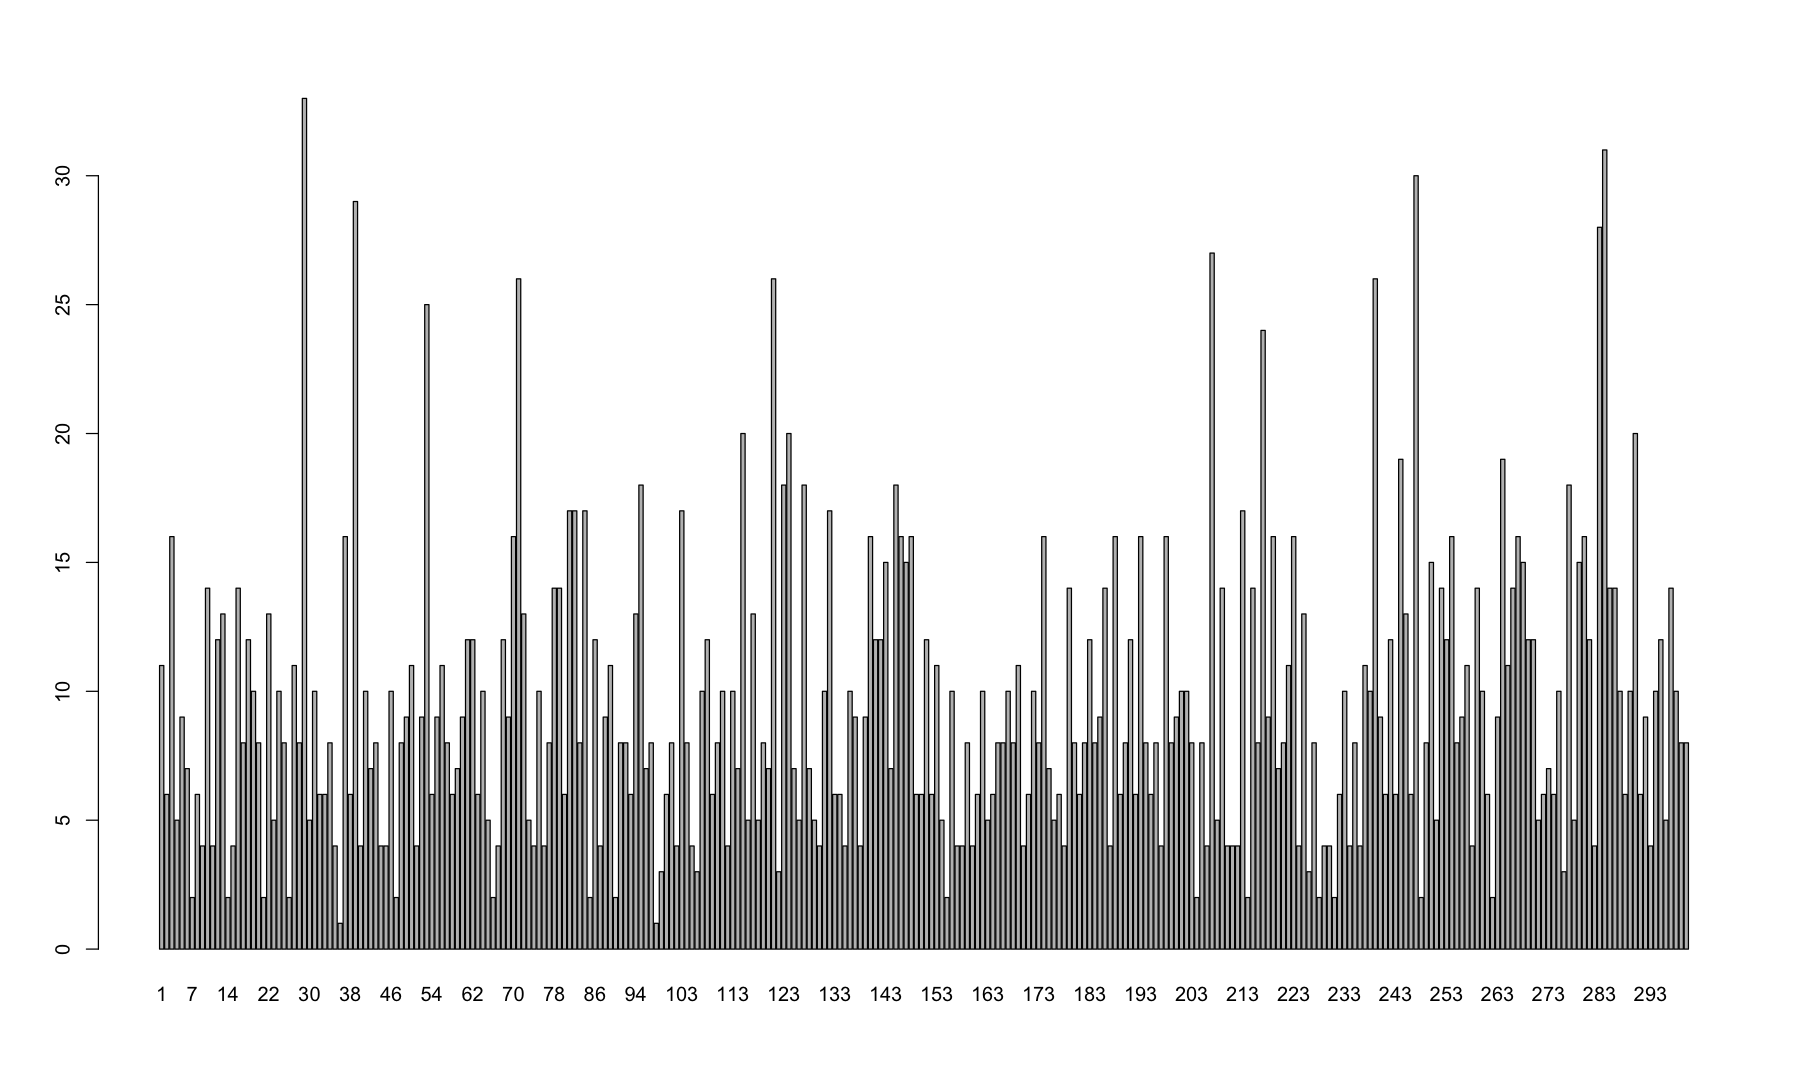

In [213]:
par(bg='white')
freq(kmeans(newTest_df,centers = 300,iter.max = 10000)$cluster)

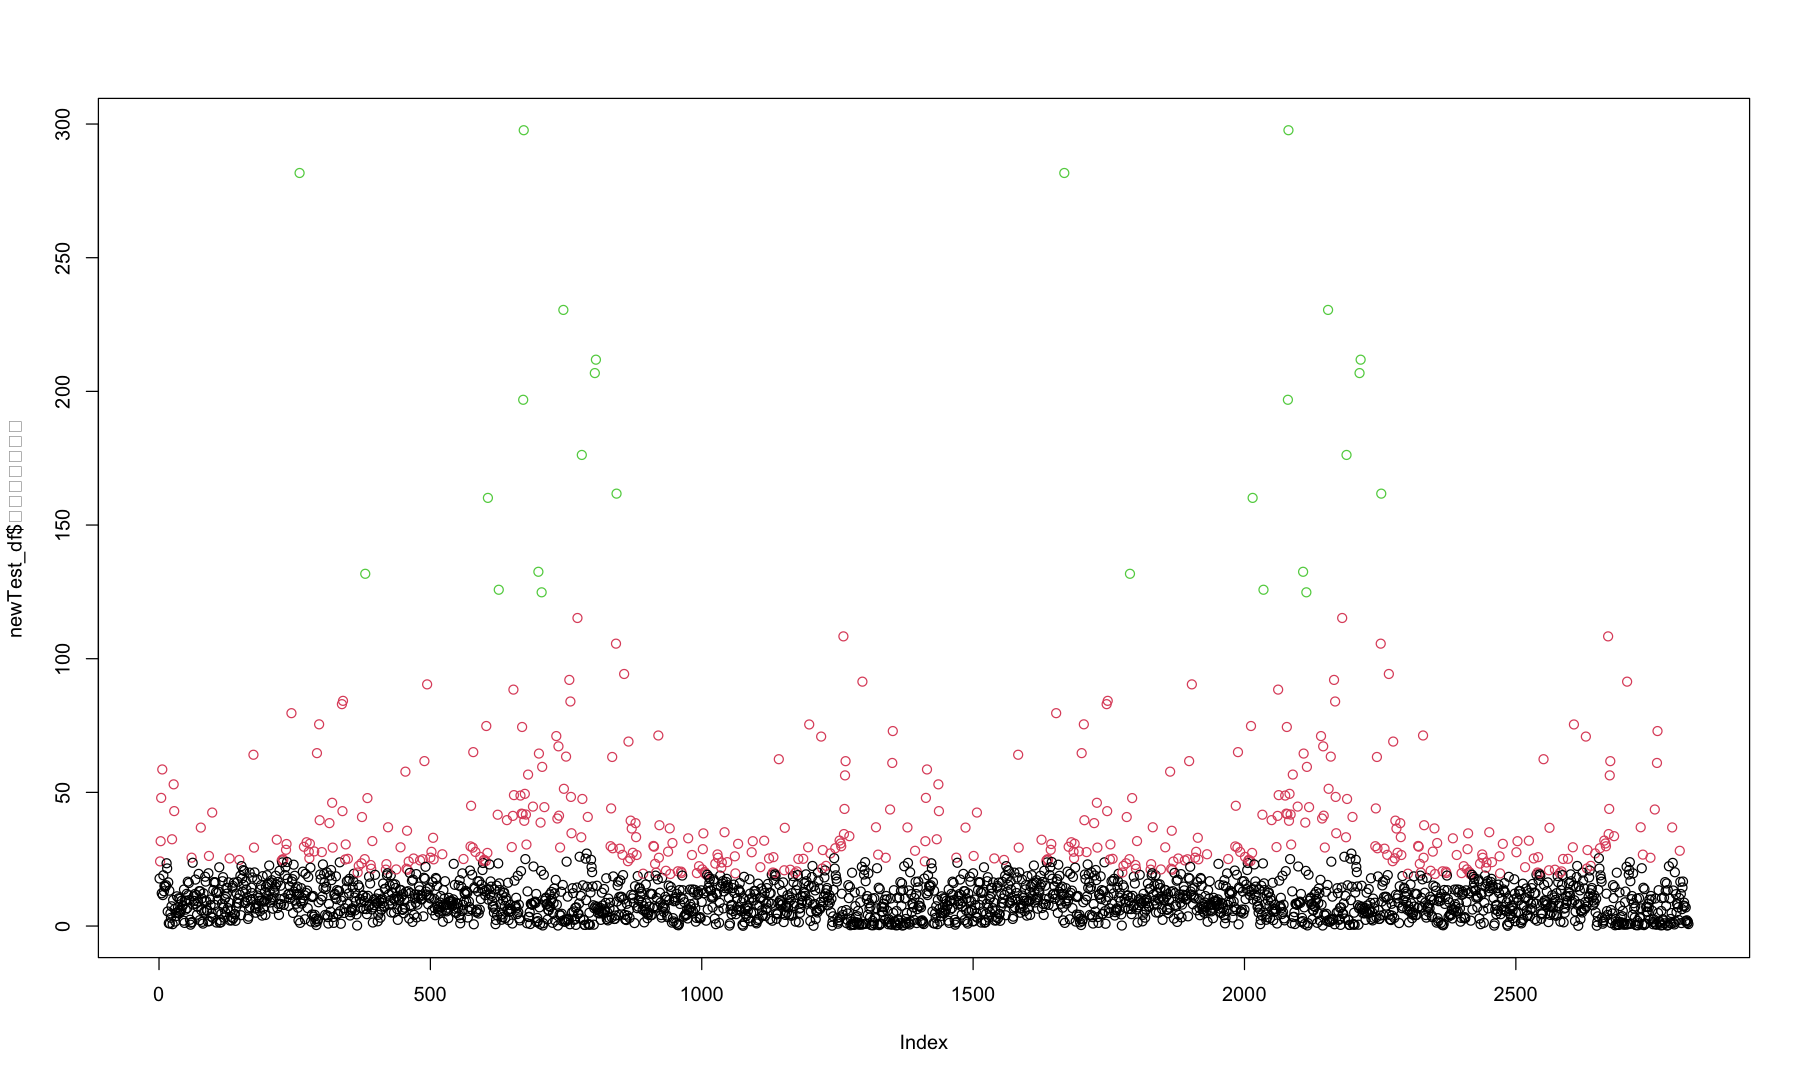

In [303]:
par(bg='white')
plot(
    newTest_df$소재지별생산량,
    col=kmeans(newTest_df, centers = 3,iter.max = 10000)$cluster
)

In [ ]:
boxplot(
    newTest_df$소재지별생산량
)

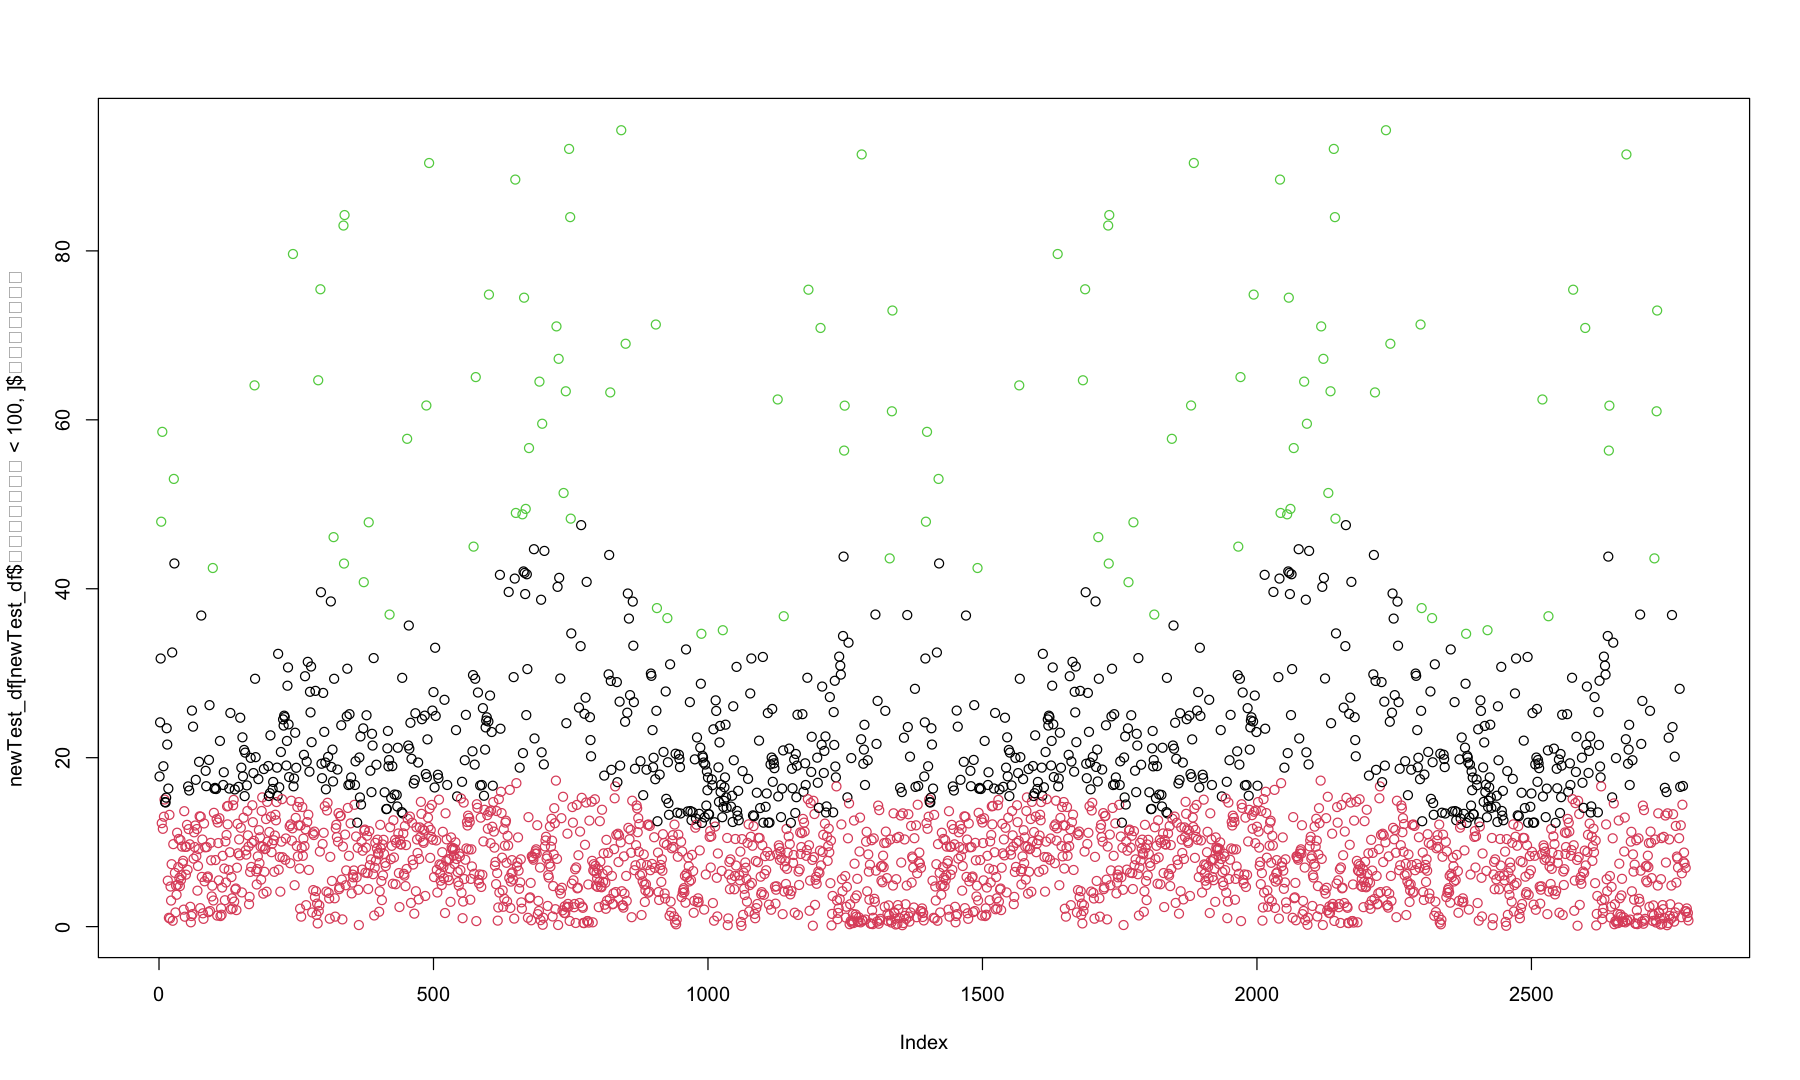

In [176]:
par(bg='white')
plot(
    newTest_df[newTest_df$소재지별생산량 < 100,]$소재지별생산량,
    col=kmeans(newTest_df[newTest_df$소재지별생산량 < 100,],centers = 3,iter.max = 10000)$cluster
)

In [214]:
newTest_df$kmeans300 <- kmeans(newTest_df,centers = 300,iter.max = 10000)$cluster

In [218]:
rfFun(randomForest, newTest_df, 10, 10)

------------------------------------------------
 예측률 
 0 0.2331361 0 0.004733728 0.003550296 0.09230769 0.002366864 0 0.1278107 0.02485207 
------------------------------------------------
 평균 예측률 
 0.04887574 
------------------------------------------------


In [215]:
newTest_df

재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량,log생산량,kmean,kmeans300
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2453,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,17.7768790,2.87789868,3,53
3337,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,24.1832227,3.18565911,3,204
4380,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,31.7418386,3.45763564,3,86
6615,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,47.9388726,3.86992671,2,199
1276,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,12.2531634,2.50578414,1,270
6100,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,58.5770351,4.07034273,2,50
1206,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,11.5809679,2.44936305,1,216
1977,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,18.9847210,2.94363450,3,159
1355,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,13.0117840,2.56585541,1,277


In [185]:
newTest_df[newTest_df$재배면적.제곱미터 > 10000,]
# newTest_df

,재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량,log생산량,kmean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
259,33599,34.57352,126.5993,74.67949,30.13191,19.91164,21.63205,281.69010,5.640808,4
339,10048,34.57352,126.5993,74.67949,30.13191,19.91164,21.63205,84.24126,4.433685,2
380,18182,36.99105,127.9260,76.30213,19.23830,18.94553,22.11489,131.76487,4.881019,4
494,10783,34.57352,126.5993,74.67949,30.13191,19.91164,21.63205,90.40341,4.504282,2
606,19103,34.57352,126.5993,74.67949,30.13191,19.91164,21.63205,160.15732,5.076157,4
626,13100,35.73166,126.7330,78.54545,15.77253,19.02532,20.92888,125.79658,4.834666,2
671,20500,35.73166,126.7330,78.54545,15.77253,19.02532,20.92888,196.85725,5.282479,4
672,31000,35.73166,126.7330,78.54545,15.77253,19.02532,20.92888,297.68657,5.696041,4
699,13800,35.73166,126.7330,78.54545,15.77253,19.02532,20.92888,132.51854,4.886723,2


In [130]:
newTest_df$kmean <- kmeans(newTest_df,centers = 4,iter.max = 10000)$cluster

In [135]:
rfFun(randomForest, newTest_df, 9, 20)

------------------------------------------------
 오차 
 0.0321874 0.03733898 0.04212933 0.05121374 0.03948651 0.0576454 0.04217513 0.04142858 0.04156521 0.04787815 0.02744172 0.04290349 0.02642833 0.05710588 0.04792324 0.03223243 0.06668584 0.04863498 0.05856592 0.03576728 
------------------------------------------------
 평균 오차 
 0.04383688 
------------------------------------------------


In [136]:
exp(0.04383688)

[1] 1.044812

In [141]:
newTest_df

재배면적.제곱미터.,위도,경도,평균습도,토양수분,평균기온,평균지면온도,소재지별생산량,log생산량,kmean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2453,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,17.7768790,2.87789868,3
3337,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,24.1832227,3.18565911,3
4380,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,31.7418386,3.45763564,3
6615,36.81536,127.7867,76.30213,19.23830,18.94553,22.11489,47.9388726,3.86992671,2
1276,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,12.2531634,2.50578414,1
6100,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,58.5770351,4.07034273,2
1206,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,11.5809679,2.44936305,1
1977,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,18.9847210,2.94363450,3
1355,35.56985,126.8560,78.54545,15.77253,19.02532,20.92888,13.0117840,2.56585541,1
